In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

####  Analyse the data using the visualizations


In [25]:
df=pd.read_csv('Zoo.csv')

In [26]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [28]:
df.shape

(101, 18)

In [29]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [30]:
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21800\1235342427.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap="coolwarm")


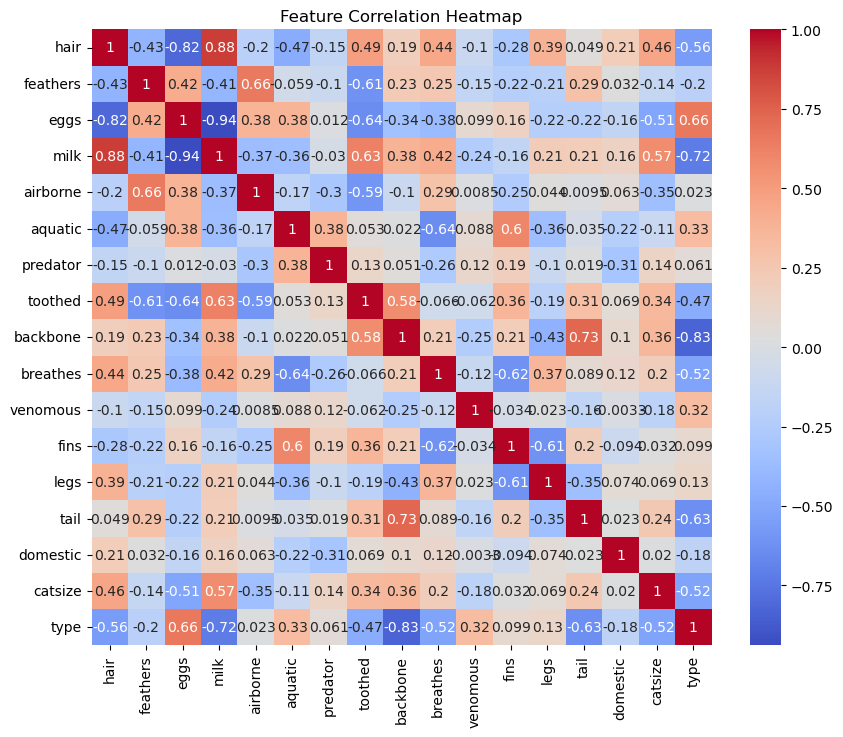

In [31]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.title('Feature Correlation Heatmap')
plt.show()

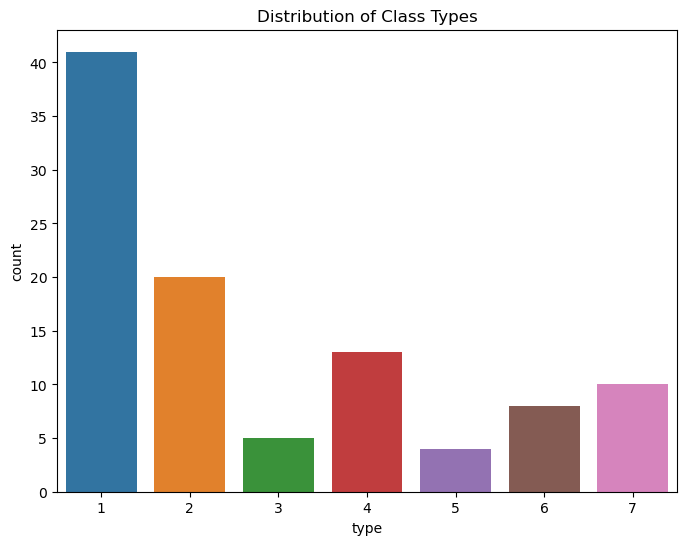

In [32]:
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=df)
plt.title('Distribution of Class Types')
plt.show()

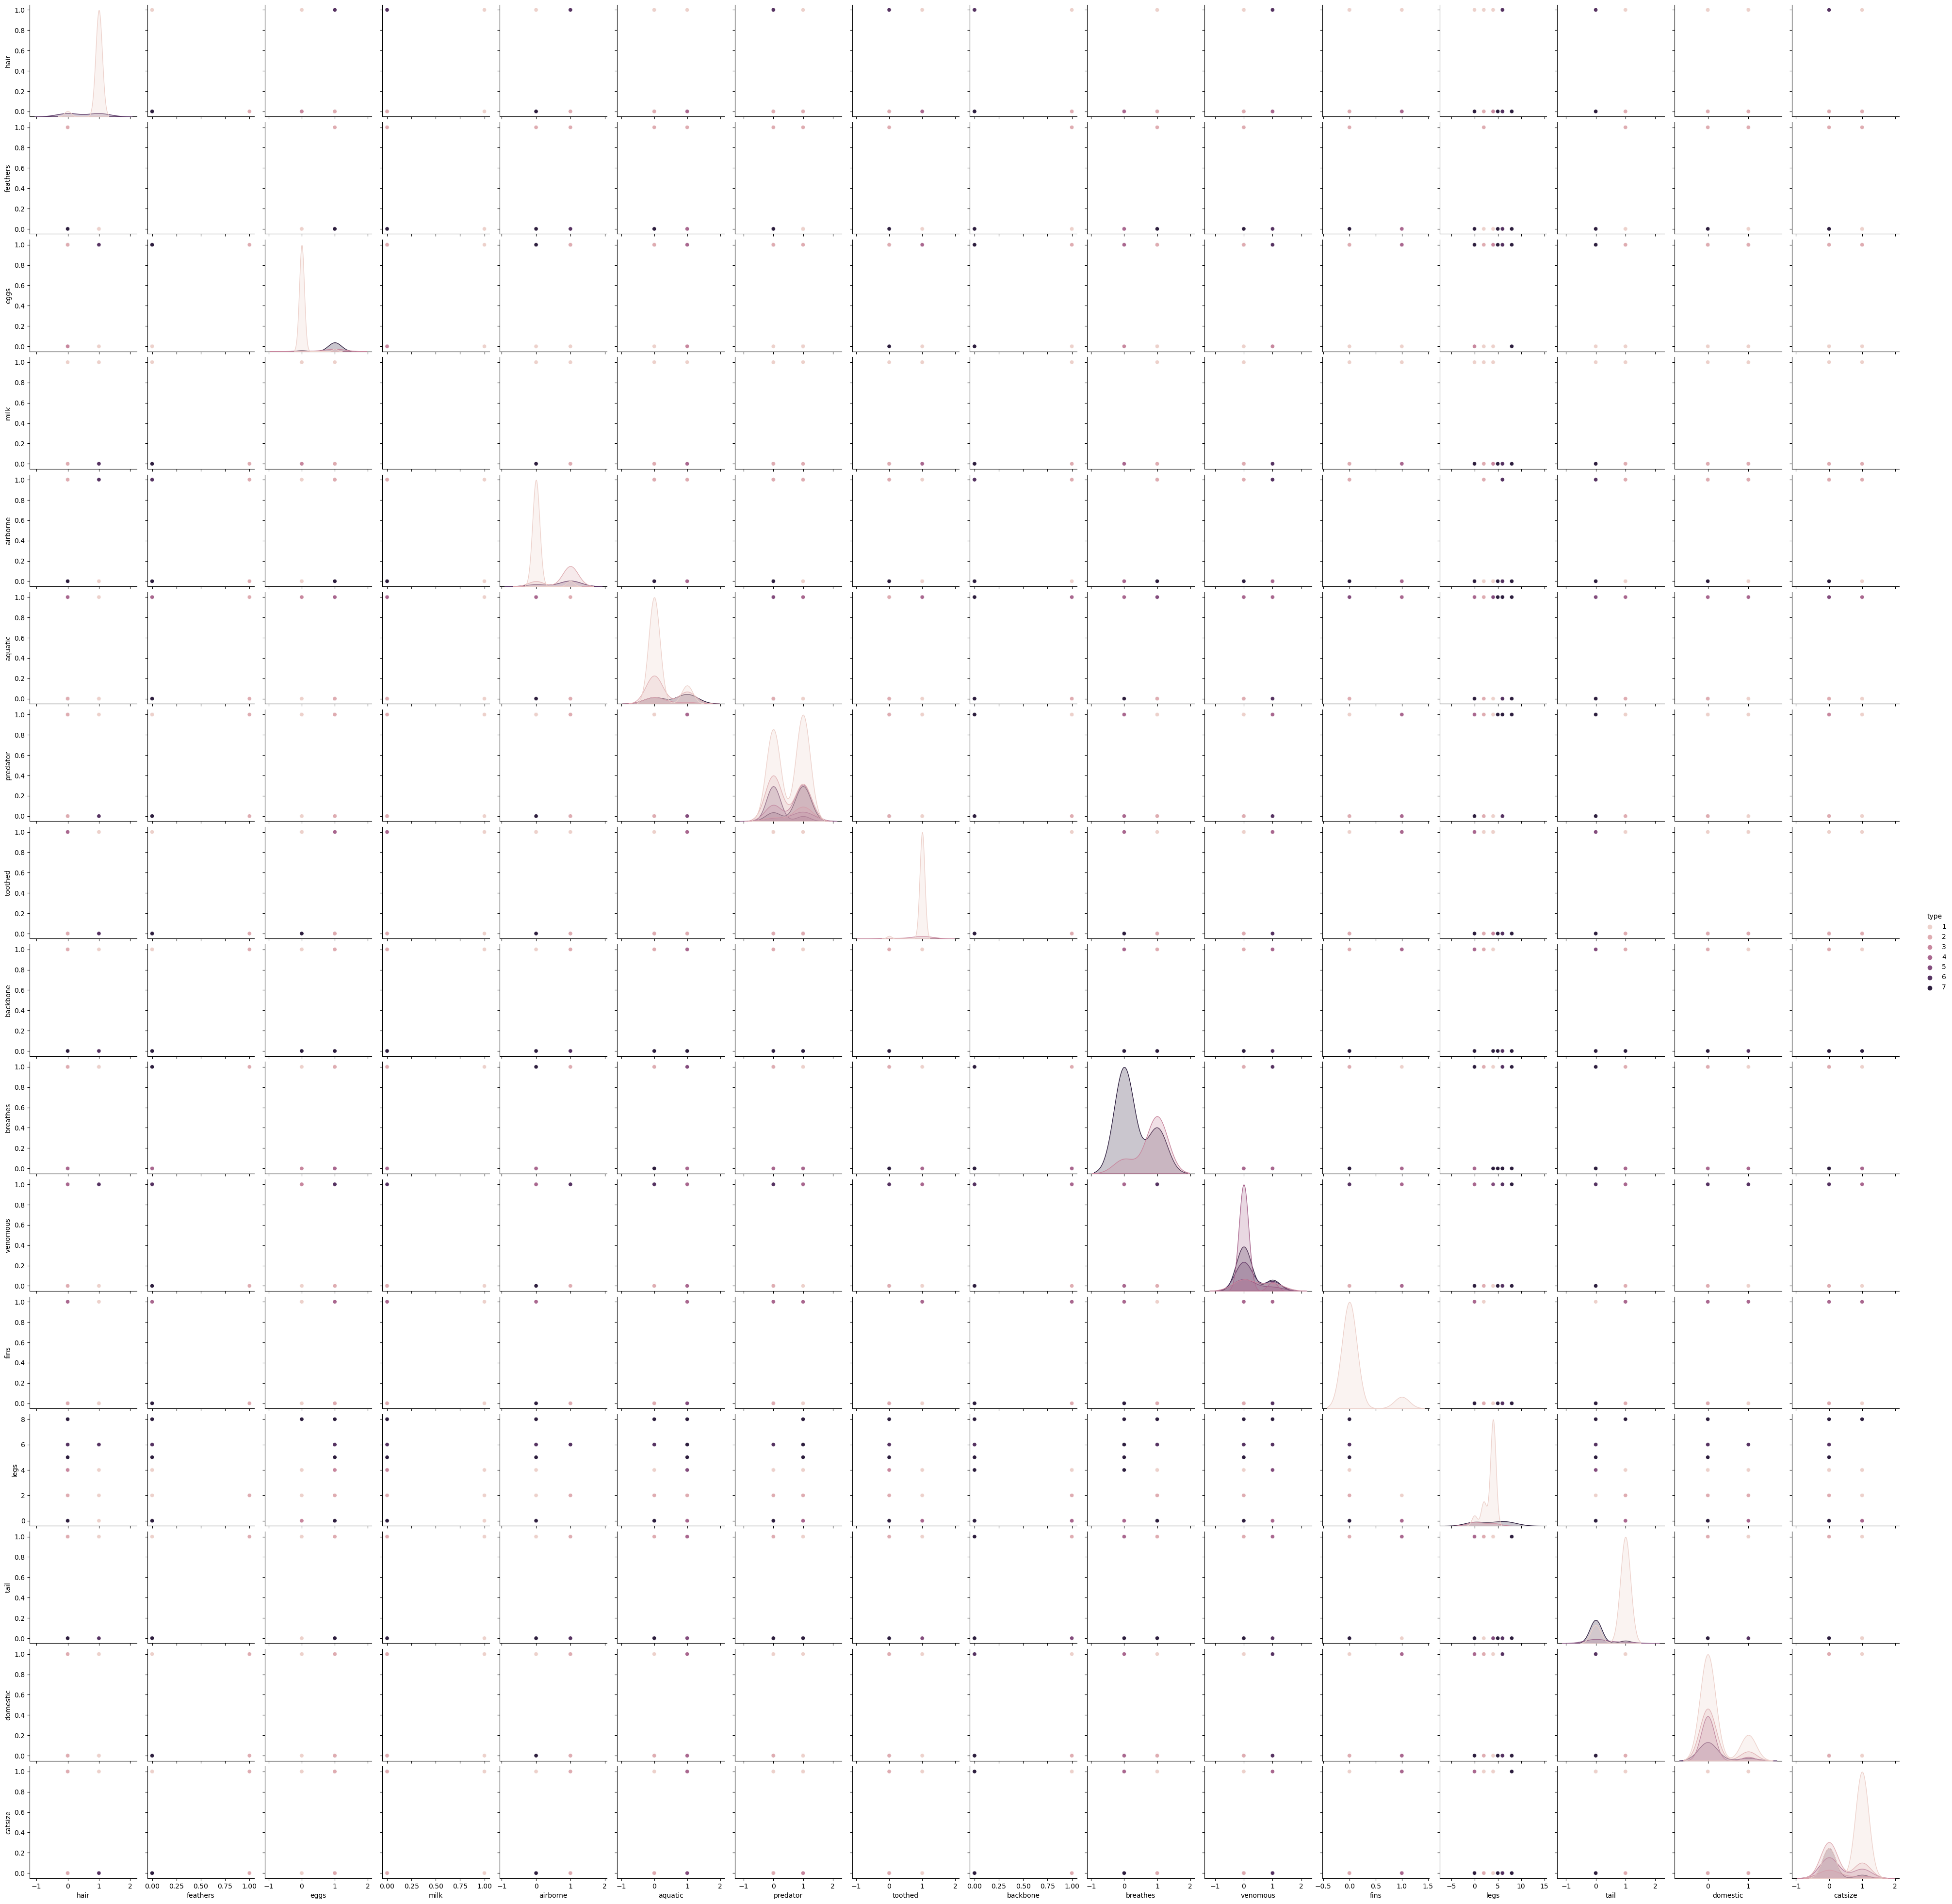

In [33]:
sns.pairplot(df, hue='type')
plt.show()

#### Preprocess the data by handling missing values & Outliers, if any.

In [34]:
features=df.drop(columns=['type'])
features.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [35]:
target=df[['type']]

In [36]:
target.head()

,type
0,1
1,1
2,4
3,1
4,1


In [37]:
num_col= [i for i in features.columns if features[i].dtype!='O']
cat_col=[i for i in features.columns if features[i].dtype=='O']

In [38]:
print(num_col)

['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize']


In [39]:
print(cat_col)

['animal name']


In [40]:
features[cat_col]
ord_enc= OrdinalEncoder()
df2=pd.DataFrame(ord_enc.fit_transform(features[cat_col]),columns=cat_col)
df2.head()

,animal name
0,0.0
1,1.0
2,2.0
3,3.0
4,4.0


In [49]:
features_new= pd.concat([df2,df[['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize']]],axis=1)
features_new

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,0.0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1.0,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,2.0,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,3.0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,4.0,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,95.0,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,96.0,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,97.0,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,98.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [69]:
def outlier_capping(df, column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    df[column]=df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

In [76]:
for col in df.select_dtypes(include=['float','int']).columns:
    outlier_capping(df,col)

In [77]:
df.shape

(101, 18)

#### Split the dataset into training and testing sets (80% training, 20% testing).

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(features_new,target,train_size=0.80,random_state=100)
print(x_train.shape)

(75, 17)


In [79]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(75, 17)
(26, 17)
(75, 1)
(26, 1)


#### Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset

In [88]:
import warnings
warnings.filterwarnings('ignore')

In [118]:
knn=KNeighborsClassifier(n_neighbors=1,metric='euclidean')

In [119]:
knn.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [120]:
y_pred = knn.predict(x_test)
print(y_pred)

[4 2 6 1 1 6 6 4 2 2 1 7 1 3 5 2 1 1 4 4 1 4 4 1 1 2]


#### Choose an appropriate distance metric and value for K.

In [121]:
params=dict(n_neighbors=range(1,100))
grid_search=GridSearchCV(knn,params)
grid_search.fit(x_train,y_train)
grid_search.best_params_

{'n_neighbors': 1}

In [122]:
params=dict(metric=['euclidean', 'manhattan'])
grid_search=GridSearchCV(knn,params)
grid_search.fit(x_train,y_train)
grid_search.best_params_

{'metric': 'euclidean'}

#### Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.

In [132]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.38461538461538464

In [133]:
precision=precision_score(y_test,y_pred,average='weighted')
precision

0.49059829059829063

In [137]:
recall=recall_score(y_test,y_pred,average='weighted')
recall

0.38461538461538464

In [136]:
f1=f1_score(y_test,y_pred,average='weighted')
f1

0.42928994082840244

In [143]:
print(confusion_matrix(y_test, y_pred))

[[7 2 0 1 0 1 0]
 [1 2 0 5 0 0 0]
 [0 0 1 0 0 0 0]
 [1 1 0 0 0 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0]]


In [142]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.78      0.64      0.70        11
           2       0.40      0.25      0.31         8
           3       1.00      1.00      1.00         1
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         0

    accuracy                           0.38        26
   macro avg       0.31      0.27      0.29        26
weighted avg       0.49      0.38      0.43        26



#### Visualize the decision boundaries of the classifier.

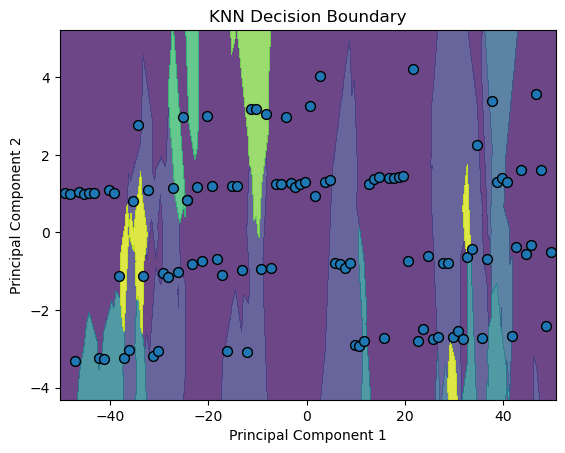

In [148]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

# Step 1: Reduce the dataset to two dimensions if necessary (using PCA)
# If your dataset has more than 2 features, apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(features_new)  # Use the entire feature set for PCA

# Step 2: Train the KNN model (already trained)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_pca, target)

# Step 3: Create a meshgrid to plot the decision boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Step 4: Predict for each point in the meshgrid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Step 5: Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8)

# Step 6: Plot the training points
plt.scatter(X_pca[:, 0], X_pca[:, 1], edgecolors='k', marker='o', s=50, cmap=plt.cm.RdYlBu)
plt.title("KNN Decision Boundary")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


#### Interview Questions:

#1. What are the key hyperparameters in KNN?
K-Nearest Neighbors (KNN) is a simple yet powerful machine learning algorithm used for classification and regression tasks. The key hyperparameters in KNN include:

1.Number of Neighbors (k):
The number of nearest neighbors to consider for determining the output.
A smaller 𝑘 makes the model sensitive to noise, while a larger 𝑘 smoothens the decision boundary but may overlook local patterns.

2.Distance Metric:  
Determines how the "closeness" between points is calculated. Common options include: 
Minkowski Distance: A generalization of both, with a tunable parameter 𝑝.

3.Weighting of Neighbors:
Determines whether all neighbors contribute equally or weighted by their distance: 
Uniform Weight: All neighbors have equal importance.
Distance Weight: Closer neighbors have more influence.

4.Algorithm for Nearest Neighbor Search:
Determines how the neighbors are found efficiently:
Ball Tree: Suitable for low-dimensional data.   
KD-Tree: Effective for moderate dimensions.

5.Leaf Size (for Ball Tree or KD-Tree):
Affects the efficiency of the search algorithm. Larger values reduce the tree-building time but may slow down queries.

6.P Parameter (for Minkowski Distance):
Defines the power parameter of the Minkowski metric:

7.Number of Jobs (𝑛_jobs):
Specifies the number of parallel jobs to speed up computation. Useful for large datasets.

8.Metric Parameters:
Additional parameters specific to the chosen distance metric. For example, custom metrics may have their own tunable hyperparameters.

#2. What distance metrics can be used in KNN?
The k-Nearest Neighbors (KNN) algorithm relies on a distance metric to measure the similarity between data points. Different distance metrics can be used depending on the nature of the data and the problem. Here are the most common distance metrics:
1. Euclidean Distance
Description: This is the most common metric, measuring the straight-line distance between two points in n-dimensional space.
Use case: Suitable for continuous numerical data.
2. Manhattan Distance (L1 Norm)
Description: Measures the distance between two points by summing the absolute differences of their coordinates.
Use case: Works well when data dimensions are independent and have different units or scales.
3. Bray-Curtis Distance
Description: Quantifies the compositional dissimilarity between two distributions.
Use case: Commonly used in ecological and environmental data analysis.
4. Jaccard Distance
Description: Measures dissimilarity between sets as the complement of their overlap.
Use case: Useful for comparing sets or binary data.
5. Chebyshev Distance  
Description: Measures the greatest absolute difference along any dimension.
Use case: Useful in problems where movement is restricted along grid-like paths (e.g., chessboard distance).
6. Hamming Distance
Description: Counts the number of differing components between two categorical or binary vectors.
Use case: Suitable for categorical, binary, or string data.
 